In [2]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [ ]:
spectra = pd.read_csv('./data/viral_spectra_dataset.csv').query('df == "nemu"')
# spectra = spectra.melt(['Type', 'taxname', 'virusname'], 
#         spectra.columns[:12], 'Mut', 'Rate').sort_values(['virusname', 'Mut'])
spectra

,A>C,A>G,A>T,C>A,C>G,C>T,G>A,G>C,G>T,T>A,T>C,T>G,Type,taxname,df,taxid,virusname
0,0.109127,0.117342,0.073464,0.060217,0.011690,0.149450,0.196651,0.026968,0.020779,0.036932,0.132424,0.064957,ds,Hepatitis B virus,nemu,10407,HBV
1,0.034784,0.086621,0.027108,0.044784,0.006846,0.339187,0.234664,0.000000,0.102792,0.009995,0.095861,0.017356,ds,Rice black streaked dwarf virus,nemu,10990,RBSDV
2,0.012922,0.127692,0.009847,0.022595,0.001792,0.379747,0.123494,0.003866,0.031890,0.022814,0.249177,0.014165,+,West Nile virus,nemu,11082,WNV
3,0.009244,0.183506,0.025201,0.014157,0.002805,0.243095,0.227613,0.012168,0.021287,0.031341,0.224274,0.005309,+,Norwalk virus,nemu,11983,norw
4,0.008840,0.102109,0.025178,0.031668,0.010016,0.490211,0.153864,0.018815,0.025828,0.020681,0.106414,0.006376,+,Hepatovirus A,nemu,12092,HAV
5,0.012652,0.223645,0.018232,0.014670,0.002589,0.201530,0.137092,0.014227,0.017123,0.020364,0.319673,0.018203,+,Foot-and-mouth disease virus,nemu,12110,FMDV
6,0.023573,0.236911,0.063843,0.026172,0.019579,0.233199,0.139336,0.012520,0.030695,0.032620,0.165367,0.016185,+,Citrus tristeza virus,nemu,12162,CTV
7,0.007133,0.108281,0.018650,0.025002,0.004258,0.287104,0.184085,0.007617,0.012060,0.041765,0.293600,0.010445,+,Dengue virus,nemu,12637,denv
8,0.017020,0.091356,0.028301,0.044811,0.004483,0.357214,0.095441,0.009720,0.158906,0.017986,0.153859,0.020902,+,Porcine epidemic diarrhea virus,nemu,28295,PEDV
9,0.019673,0.236590,0.032809,0.015163,0.019141,0.217214,0.148364,0.015851,0.042233,0.026322,0.211156,0.015485,+,Porcine reproductive and respiratory syndrome ...,nemu,28344,PRRSV


In [6]:
mut_all = pd.read_csv('./data/allmut_nemu.csv')
mut_ns = mut_all[mut_all['Label'] == 0]
mut_ns

,Mut,Label,PosInGene,PosInCodon,RefCodon,AltCodon,RefAa,AltAa,ProbaRef,ProbaMut,ProbaFull,RefNode,AltNode,Gene,taxid,Type,taxname,df,virusname
0,A[G>A]A,0,29,2,AGA,AAA,R,K,0.316040,0.301881,0.301881,Node1,Node2,1,10407,ds,Hepatitis B virus,nemu,HBV
2,G[C>T]C,0,773,2,GCC,GTC,A,V,0.645726,0.321229,0.321229,Node1,Node2,1,10407,ds,Hepatitis B virus,nemu,HBV
3,A[G>A]C,0,776,2,AGC,AAC,S,N,0.657652,0.314946,0.314946,Node1,Node2,1,10407,ds,Hepatitis B virus,nemu,HBV
4,C[A>G]C,0,797,2,CAC,CGC,H,R,0.574844,0.342262,0.342262,Node1,Node2,1,10407,ds,Hepatitis B virus,nemu,HBV
5,A[G>A]G,0,904,1,GGA,AGA,G,R,0.736543,0.713864,0.713864,Node1,Node2,1,10407,ds,Hepatitis B virus,nemu,HBV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594233,A[A>T]T,0,812,2,AAT,ATT,N,I,0.997930,0.997930,0.997930,Node2,RN_3,1,77763,ds,Banna virus,nemu,BAV
594235,C[A>G]C,0,1391,2,CAC,CGC,H,R,0.987528,0.987528,0.987528,Node2,RN_3,1,77763,ds,Banna virus,nemu,BAV
594244,A[G>A]C,0,68,2,AGC,AAC,S,N,0.999620,0.999620,0.999620,Node11,RN_9,1,77763,ds,Banna virus,nemu,BAV
594246,G[G>T]C,0,1153,1,GCT,TCT,A,S,0.999950,0.999950,0.999950,Node11,RN_9,1,77763,ds,Banna virus,nemu,BAV


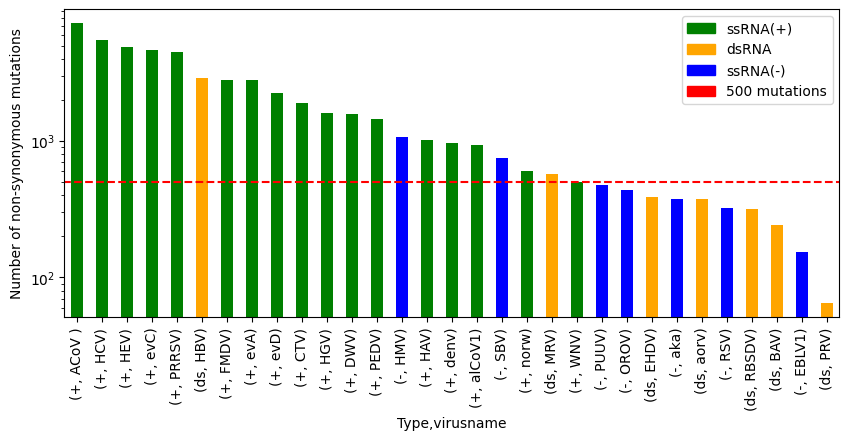

In [31]:
_d = mut_ns.groupby(['Type', 'virusname']).ProbaFull.sum().sort_values(ascending=False)
plt.figure(figsize=(10, 4))
_d.plot.bar(color=_d.index.get_level_values(0).map({'+': 'green', 'ds': 'orange', '-': 'blue'}))

plt.hlines(y=500, xmin=-1, xmax=mut_all['virusname'].nunique(), color='red', linestyle='--')
plt.ylabel('Number of non-synonymous mutations')
plt.yscale('log')
legend_labels = {'green': 'ssRNA(+)', 'orange': 'dsRNA', 'blue': 'ssRNA(-)', 'red': '500 mutations'}
patches = [mpatches.Patch(color=color, label=label) for color, label in legend_labels.items()]
plt.legend(handles=patches, loc="upper right")
plt.savefig('figures/ns_mut_cnt.pdf', bbox_inches='tight')
plt.show()

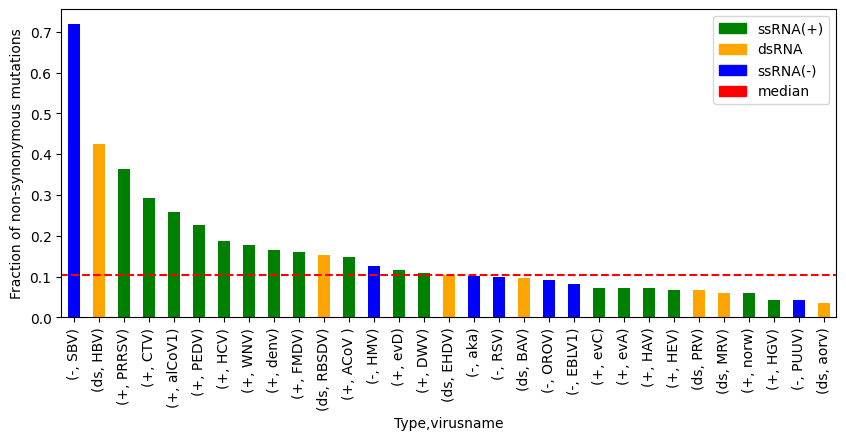

In [ ]:
dnds = mut_all.groupby(['Type', 'virusname', 'Label']).ProbaFull.sum().unstack()
dnds['Dn'] = dnds[0]
dnds['Ds'] = dnds[1] + dnds[2]
dnds['DnDs'] = dnds['Dn'] / (dnds['Dn'] + dnds['Ds'])

_d = dnds.DnDs.sort_values(ascending=False)




plt.figure(figsize=(10, 4))
_d.plot.bar(color=_d.index.get_level_values(0).map({'+': 'green', 'ds': 'orange', '-': 'blue'}))
plt.hlines(y=_d.median(), xmin=-1, xmax=_d.index.nunique(), color='red', linestyle='--', label='median')
legend_labels = {'green': 'ssRNA(+)', 'orange': 'dsRNA', 'blue': 'ssRNA(-)', 'red': 'median'}
patches = [mpatches.Patch(color=color, label=label) for color, label in legend_labels.items()]
plt.legend(handles=patches, loc="upper right")
plt.ylabel('Fraction of non-synonymous mutations')
plt.savefig('figures/ns_mut_frac.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [30]:
vir_fit = pd.read_csv('./data/virs_fit_metrics.csv')\
    .sort_values(['Type', 'mut_count']).set_index(['Type', 'virusname'])

vir_fit[['spearman_corr', 'spearman_p', 'pearson_corr', 'pearson_p', 
         'log_likelihood', 'accuracy', 'mut_count']].round(3)

spearman_corr  spearman_p  pearson_corr  pearson_p  \
Type virusname                                                       
+    WNV                0.574         0.0         0.420      0.000   
     norw               0.501         0.0         0.365      0.000   
     alCoV1             0.360         0.0         0.359      0.000   
     denv               0.588         0.0         0.452      0.000   
     HAV                0.333         0.0         0.193      0.018   
     PEDV               0.504         0.0         0.450      0.000   
     DWV                0.652         0.0         0.429      0.000   
     HGV                0.525         0.0         0.325      0.000   
     CTV                0.756         0.0         0.593      0.000   
     evD                0.632         0.0         0.536      0.000   
     evA                0.597         0.0         0.496      0.000   
     FMDV               0.680         0.0         0.531      0.000   
     PRRSV              0.803         0.0         0.821      0.000   
     evC                0.671         0.0         0.469      0.000   
     HEV                0.766         0.0         0.735      0.000   
     HCV                0.592         0.0         0.444      0.000   
     ACoV               0.572         0.0         0.404      0.000   
-    SBV                0.578         0.0         0.531      0.000   
     HMV                0.617         0.0         0.378      0.000   
ds   MRV                0.574         0.0         0.387      0.000   
     HBV                0.597         0.0         0.474      0.000   

                log_likelihood  accuracy  mut_count  
Type virusname                                       
+    WNV                -5.684     0.506    501.693  
     norw               -5.825     0.483    598.962  
     alCoV1             -6.067     0.584    929.824  
     denv               -5.712     0.560    972.842  
     HAV                -6.295     0.456   1020.310  
     PEDV               -6.013     0.573   1458.280  
     DWV                -5.885     0.551   1568.950  
     HGV                -5.871     0.590   1613.560  
     CTV                -5.727     0.690   1913.750  
     evD                -5.509     0.578   2261.520  
     evA                -5.527     0.534   2801.190  
     FMDV               -5.626     0.591   2802.690  
     PRRSV              -5.608     0.776   4482.460  
     evC                -5.646     0.564   4620.750  
     HEV                -5.526     0.676   4869.510  
     HCV                -5.823     0.520   5532.530  
     ACoV               -5.848     0.607   7281.830  
-    SBV                  -inf     0.580    752.477  
     HMV                -5.786     0.525   1063.280  
ds   MRV                -5.766     0.518    576.372  
     HBV                -5.846     0.648   2874.590

In [65]:
vir_fit[['spearman_corr', 'pearson_corr', 'accuracy', 'mut_count']]\
    .reset_index().drop('virusname', axis=1).groupby('Type').mean().round(2)

,spearman_corr,pearson_corr,accuracy,mut_count
Type,,,,
+,0.59,0.47,0.58,2660.63
-,0.60,0.45,0.55,907.88
ds,0.59,0.43,0.58,1725.48


<Axes: xlabel='Type', ylabel='accuracy'>

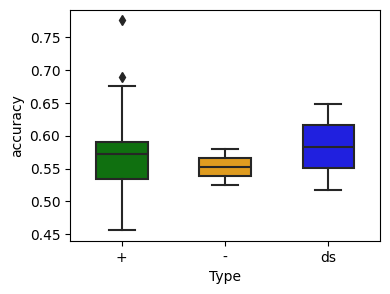

In [73]:
plt.figure(figsize=(4, 3))
sns.boxplot(vir_fit.reset_index(), x='Type', y='accuracy', 
            palette=['green', 'orange', 'blue'], width=0.5)